# Clasificador de aves

A partir del código de la red neuronal que reconocía el lenguaje de signos, hemos desarrollado una red neuronal cuyo objetivo es distinguir entre distintos tipos de aves. El dataset que se utilizará estará contenido dentro de nuestra cuenta de Google Drive y las imágenes de este último han sido sacadas de un dataset publicado en la plataforma Kaggle llamado [325 Bird Species - Classification](https://www.kaggle.com/gpiosenka/100-bird-species/code). De este dataset, hemos seleccionado 6 aves distintas para clasificar con nuestra red neuronal. Todas las imágenes del dataset tienen un tamaño de 224x224.



En primer lugar, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este notebook y comprobaremos que estamos utilizando una GPU.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
tf.test.gpu_device_name()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/device:GPU:0'

Con el siguiente código, mostraremos una de las imágenes de nuestro dataset y guardaremos en una lista los distintos tipos de aves a distinguir. Tendremos 6 categorias de aves:

0.   Águila
1.   Canario
2.   Flamenco
3.   Fodi Rojo
4.   Lechuza
5.   Pingüino



 Águila   Canario   Flamenco  'Fodi rojo'   Lechuza   Pingüino


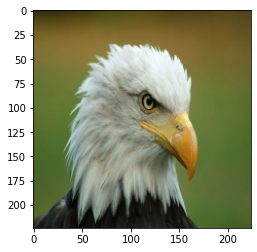

In [ ]:
!ls "/content/drive/MyDrive/Trabajo FSI/Pájaros/train"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/Trabajo FSI/Pájaros/train/Águila/001.jpg', 'r')
imshow(np.asarray(pil_im))

class_names = ["Águila", "Canario", "Flamenco", "Fodi Rojo", "Lechuza", "Pingüino"]


Probaremos 7 modelos distintos de la red neuronal, cambiando para ello los distintos hiperparámetros, con el objetivo de encontrar cual de ellos es el que nos ofrece unos mejores resultados.

En todos los modelos implementados hemos realizado un **Data Augmentation**, técnica utilizada para aumentar la diversidad del conjunto de imágenes de entrenamiento mediante la aplicación de transformaciones aleatorias (pero realistas), como la rotación de imágenes. Para ello hemos utilizado las capas de preprocesamiento de Keras. 

Además, hemos escogido 20 como valor del batch_size pues a partir de dicho valor no encontramos diferencias en cuanto al tiempo de ejecución.

En primer lugar, separaremos nuestro dataset, el cual consta de 720 imágenes (120 de cada tipo de ave), en dos conjuntos de imágenes: uno de entrenamiento, con 600 imágenes; y otro de validación, con 120 imágenes. Para esta división del dataset en dos distintos conjuntos hemos usado la función *image_dataset_from_directory()*.

In [ ]:
# DATA SOURCE --------------------------------------------------
from keras.preprocessing.image import ImageDataGenerator  

image_size = (224, 224)
batch_size = 20

data_dir = '/content/drive/MyDrive/Trabajo FSI/Birds'  

#Conjunto de entrenamiento
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.168,
    subset="training",
    seed=37,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
#Conjunto de validación
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.168,
    subset="validation",
    seed=37,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)


Found 720 files belonging to 6 classes.
Using 600 files for training.
Found 720 files belonging to 6 classes.
Using 120 files for validation.


Una vez tenemos cargados los datos en dos distintos conjuntos, es hora de pasar a implementar los distintos modelos propuestos. En todos los modelos implementados hemos utilizado la función de activación ReLu, ya que, en cuanto a imágenes ofrece mucho mejor desempeño que otras funciones como la sigmoide o la tangente hiperbólica.

Además, en todos hemos aplicado las siguientes capas de preprocesamiento con el objetivo del aumento de datos y reescalado:


*   *RandomFlip()*: con esta capa lo que conseguiremos es que el modelo también trabaje con las imágenes originales invertidas horizontalmente. A esta capa, al ser la primera, le pasaremos también la forma de entrada de los datos (input_shape), que sera un tensor de de dimensiones 224x224x3. Tenemos tensores como entrada pues la imágenes no son en blanco y negro, sino que poseen color (RGB), por lo que cada píxel será representado por una tupla de 3 valores entre 0 y 255 que representarán el color del píxel. 
*   *RandomRotation()*: además de las imágenes originales y las rotadas horizontalmente, nuestro modelo también trabajará con las imágenes rotadas en un factor de entre -10% * 2pi y 10% * 2pi.
*   *Rescaling()*: hacemos un reescalado de los valores de los tensores de entrada(imágenes), que se encuentran dentro del rango [0, 255], quedándose estos dentro del rango [-1,1].







Al final de cada modelo evaluaremos los resultados mediante una gráfica que representa la precisión del modelo a lo largo de las distintas épocas y la matriz de confusión del modelo. Con esta última podremos saber si la red se está confundiendo entre dos categorías de aves distintas pues se trata de una matriz en la que las filas representan instancias de una clase real mientras que las columnas son las predicciones dadas por la red neuronal.

## Primer modelo




Este modelo constará de las siguientes capas:



1.   Capa convolutiva de 32 filtros
2.   Capa de MaxPooling
3.   Capa convolutiva de 64 filtros
4.   Capa de MaxPooling
5.   Dropout del 25%
6.   Capa convolutiva de 128 filtros
7.   Capa de Maxpooling
8.   Dropout del 25%
9.   Flatten()
10.  Capa Densa de 128 neuronas
11.  Dropout del 50%
12.  Capa Densa con 6 neuronas y función de activación softmax

Tendremos como función de error la categorical_crossentropy y para actualizar la tasa de aprendizaje utilizaremos el algoritmo de Adam.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      1

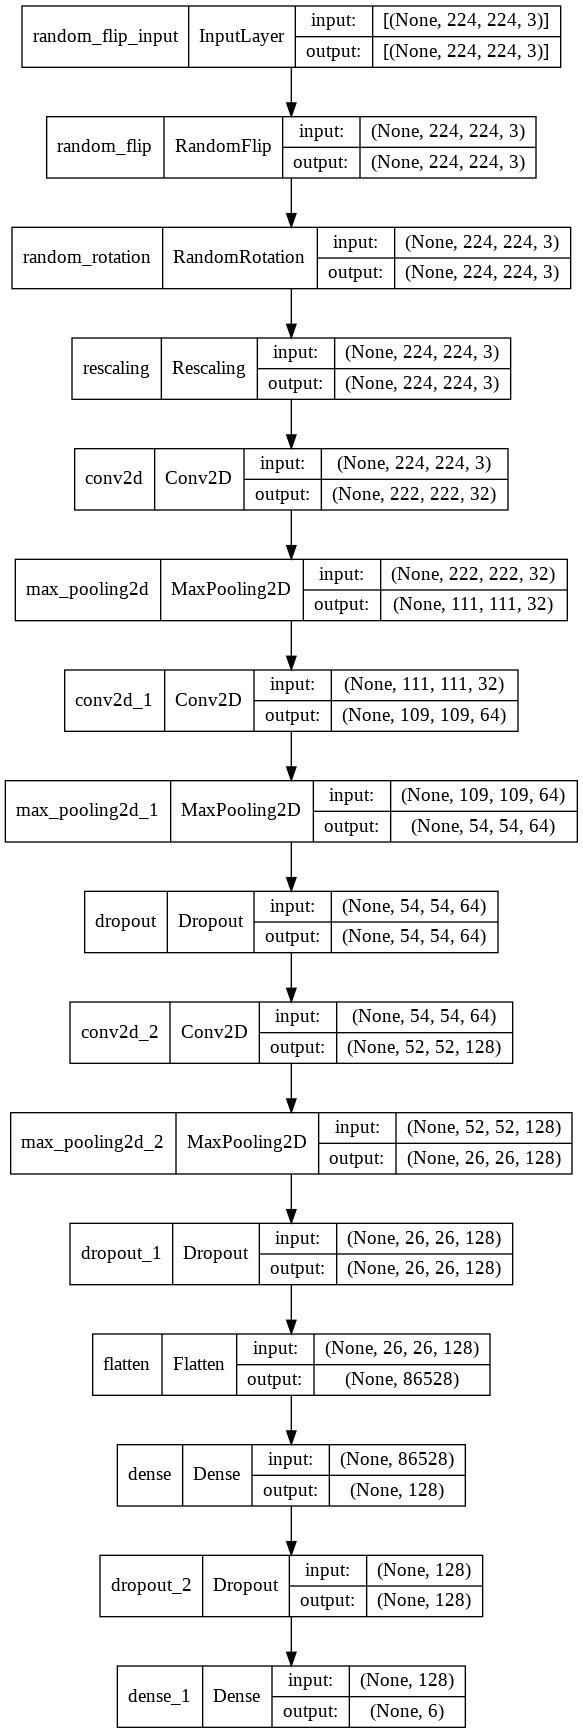

In [ ]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping


model1 = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  ])
model1.add(Rescaling(scale=(1./127.5),
                    offset=-1))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(6, activation='softmax'))

model1.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])


model1.summary()
keras.utils.plot_model(model1, "modelo1.png", show_shapes=True)

In [ ]:
# TRAINING --------------------------------------------------

epochs = 30

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

h1 = model1.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/30
30/30 [==============================] - 46s 1s/step - loss: 1.8707 - accuracy: 0.2817 - val_loss: 1.3993 - val_accuracy: 0.3917
Epoch 2/30
30/30 [==============================] - 4s 104ms/step - loss: 1.1878 - accuracy: 0.5367 - val_loss: 0.8005 - val_accuracy: 0.7250
Epoch 3/30
30/30 [==============================] - 3s 102ms/step - loss: 0.7881 - accuracy: 0.7033 - val_loss: 0.5766 - val_accuracy: 0.8167
Epoch 4/30
30/30 [==============================] - 3s 103ms/step - loss: 0.7286 - accuracy: 0.7467 - val_loss: 0.5173 - val_accuracy: 0.8333
Epoch 5/30
30/30 [==============================] - 3s 102ms/step - loss: 0.5927 - accuracy: 0.7833 - val_loss: 0.4347 - val_accuracy: 0.8583
Epoch 6/30
30/30 [==============================] - 3s 102ms/step - loss: 0.5568 - accuracy: 0.8067 - val_loss: 0.4742 - val_accuracy: 0.8333
Epoch 7/30
30/30 [==============================] - 3s 103ms/step - loss: 0.4337 - accuracy: 0.8483 - val_loss: 0.3852 - val_accuracy: 0.8833
Epoch 8/

En la primera época tenemos un tiempo bastante elevado pues la primera epoca de entrenamiento tras iniciar el entorno de ejecución tarda mucho más de lo normal. Veremos en los siguientes modelos como esto no sucede.

Vemos que el entrenamiento se ha detenido pues la precisión respecto al conjunto de validación no estaba mejorando en las últimas 5 épocas. La época que nos ofrece mejores resultados es la época 24, con un **95,83%** de precisión en cuanto al conjunto de validación.

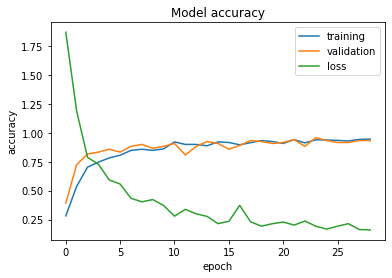

In [ ]:
#EVALUACIÓN DE RESULTADOS

import matplotlib.pyplot as plt

plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h1.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

              precision    recall  f1-score   support

      Águila     0.9545    0.9545    0.9545        22
     Canario     0.9167    1.0000    0.9565        11
    Flamenco     0.9000    0.9474    0.9231        19
   Fodi Rojo     1.0000    0.9667    0.9831        30
     Lechuza     1.0000    0.9545    0.9767        22
    Pingüino     0.9375    0.9375    0.9375        16

    accuracy                         0.9583       120
   macro avg     0.9515    0.9601    0.9552       120
weighted avg     0.9599    0.9583    0.9587       120



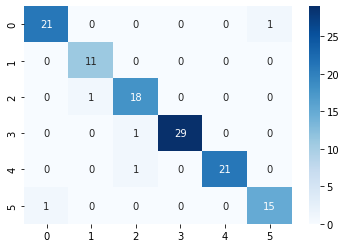

In [ ]:
#MATRIZ DE CONFUSIÓN

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model1.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4, target_names=class_names))

Como hemos obtenido una gran precisión con el modelo, es normal que no apreciemos que el programa se confunda entre dos categorías destacablemente.

In [ ]:
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Trabajo FSI/Pájaros/train/Águila/001.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model1.predict(img_array)
print(np.argmax(predictions[0]))

0


## Segundo modelo


Este modelo constará de las siguientes capas:



1.   Capa convolutiva de 64 filtros
2.   Capa de MaxPooling
3.   Capa convolutiva de 128 filtros
4.   Capa de MaxPooling
5.   Dropout del 25%
6.   Capa convolutiva de 256 filtros
7.   Capa de Maxpooling
8.   Dropout del 25%
9.   Flatten()
10.  Capa Densa de 128 neuronas
11.  Dropout del 50%
12.  Capa Densa con 6 neuronas y función de activación softmax

Tendremos como función de error la categorical_crossentropy y para actualizar la tasa de aprendizaje utilizaremos el algoritmo de Adadelta.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 128)    

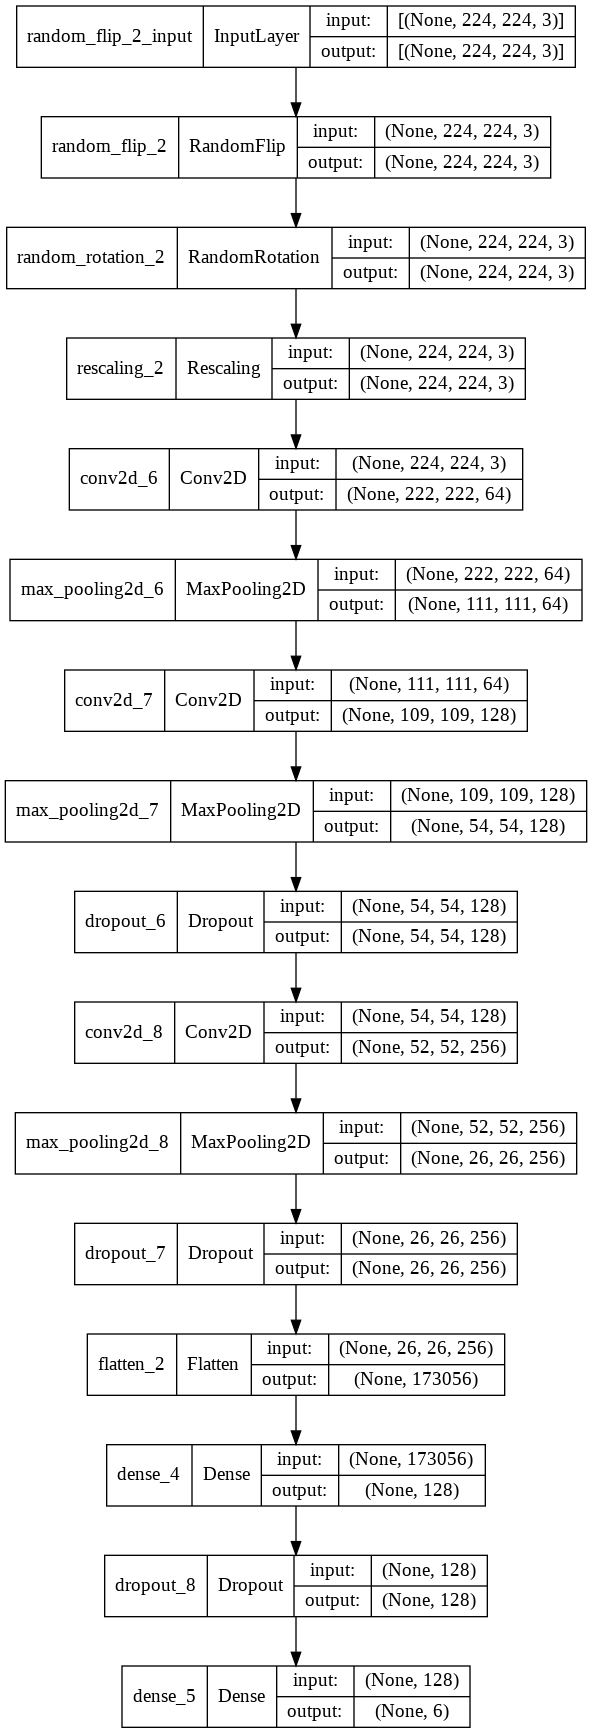

In [ ]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model2 = keras.Sequential( [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  ])
model2.add(Rescaling(scale=(1./127.5),
                    offset=-1))


model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(6, activation='softmax'))

model2.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(1e-3),
              metrics=['accuracy'])


model2.summary()
keras.utils.plot_model(model2, "modelo2.png", show_shapes=True)

In [ ]:
# TRAINING --------------------------------------------------

epochs = 30

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

h2 = model2.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/30
30/30 [==============================] - 9s 194ms/step - loss: 1.8095 - accuracy: 0.1633 - val_loss: 1.7863 - val_accuracy: 0.2417
Epoch 2/30
30/30 [==============================] - 6s 186ms/step - loss: 1.7844 - accuracy: 0.2150 - val_loss: 1.7628 - val_accuracy: 0.3833
Epoch 3/30
30/30 [==============================] - 6s 185ms/step - loss: 1.7479 - accuracy: 0.2767 - val_loss: 1.7424 - val_accuracy: 0.4417
Epoch 4/30
30/30 [==============================] - 6s 186ms/step - loss: 1.7285 - accuracy: 0.2933 - val_loss: 1.7222 - val_accuracy: 0.4833
Epoch 5/30
30/30 [==============================] - 6s 185ms/step - loss: 1.7135 - accuracy: 0.3050 - val_loss: 1.7018 - val_accuracy: 0.5000
Epoch 6/30
30/30 [==============================] - 6s 186ms/step - loss: 1.6856 - accuracy: 0.3567 - val_loss: 1.6809 - val_accuracy: 0.5167
Epoch 7/30
30/30 [==============================] - 6s 186ms/step - loss: 1.6620 - accuracy: 0.3917 - val_loss: 1.6572 - val_accuracy: 0.5417
Epoch 

Este modelo solo alcanza una precisión máxima de **64,17%**. 

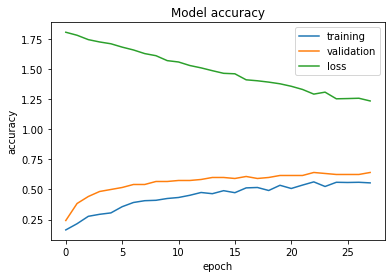

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h2.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

El valor de la función de error, en nuestro caso la categorical cross-entropy, no se disminuye de manera destacable comparando con el modelo anteriormente visto.

              precision    recall  f1-score   support

      Águila     0.5000    0.5789    0.5366        19
     Canario     0.5833    0.6364    0.6087        11
    Flamenco     0.3500    0.7000    0.4667        10
   Fodi Rojo     0.9655    0.7368    0.8358        38
     Lechuza     0.4286    0.6000    0.5000        15
    Pingüino     0.9375    0.5556    0.6977        27

    accuracy                         0.6417       120
   macro avg     0.6275    0.6346    0.6076       120
weighted avg     0.7321    0.6417    0.6638       120



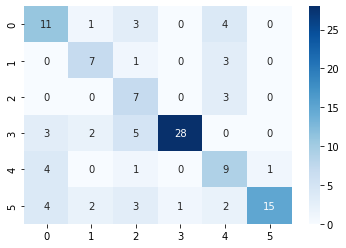

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model2.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4, target_names=class_names))

Se pueden apreciar muchos errores en cuanto a la matriz de confusión.

In [ ]:
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Trabajo FSI/Pájaros/train/Águila/001.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model2.predict(img_array)
print(np.argmax(predictions[0]))

0


## Tercer modelo


Este modelo constará de las siguientes capas:



1.   Capa convolutiva de 64 filtros
2.   Capa de MaxPooling
3.   Capa convolutiva de 128 filtros
4.   Capa de MaxPooling
5.   Dropout del 25%
6.   Capa convolutiva de 256 filtros
7.   Capa de Maxpooling
8.   Dropout del 25%
9.   Flatten()
10.  Capa Densa de 128 neuronas
11.  Dropout del 50%
12.  Capa Densa con 6 neuronas y función de activación softmax

Tendremos como función de error la categorical_crossentropy y para actualizar la tasa de aprendizaje utilizaremos el algoritmo de Adagrad. Este modelo se diferencia en cuanto al anterior exclusivamente en el algoritmo de actualización de la tasa de aprendizaje.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_3 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 128)    

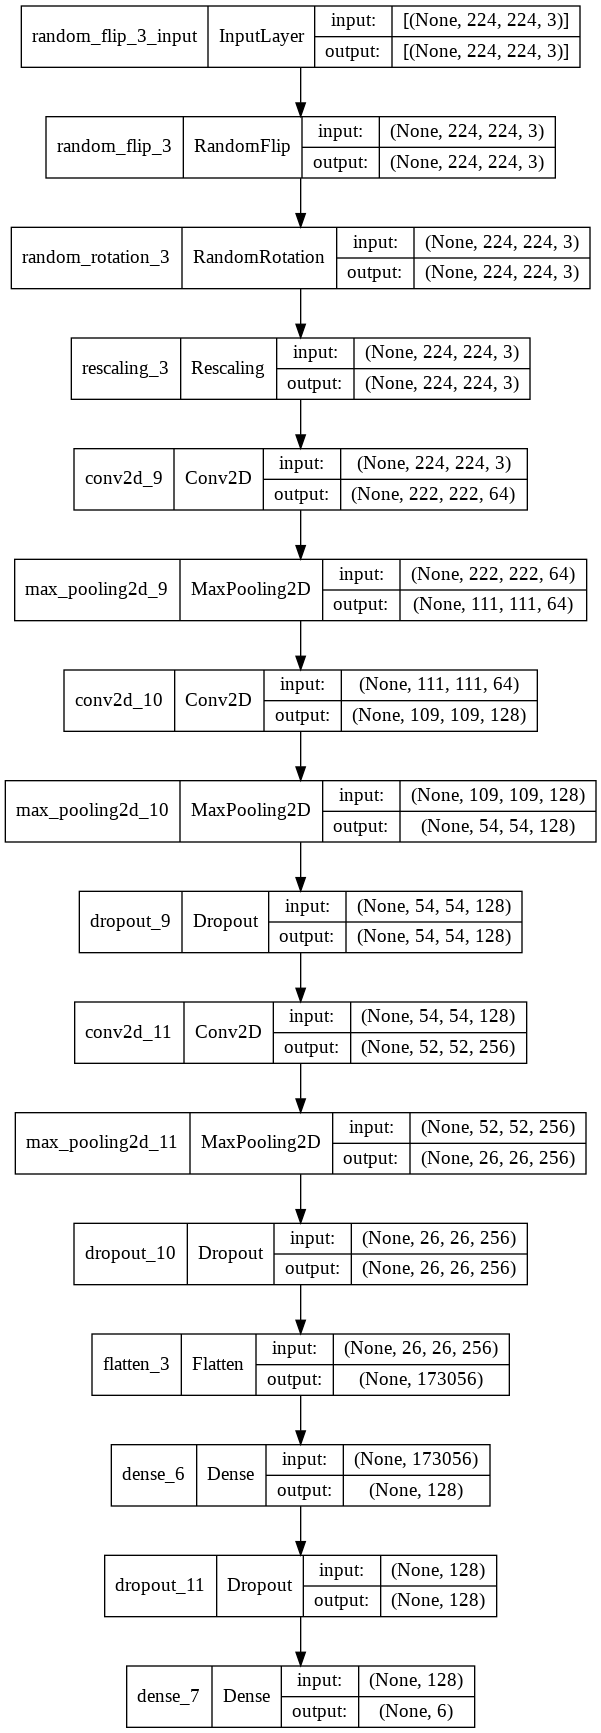

In [ ]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model3 = keras.Sequential( [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  ])
model3.add(Rescaling(scale=(1./127.5),
                    offset=-1))


model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(256, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(6, activation='softmax'))

model3.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adagrad(1e-3),
              metrics=['accuracy'])


model3.summary()
keras.utils.plot_model(model3, "modelo3.png", show_shapes=True)

In [ ]:
# TRAINING --------------------------------------------------

epochs = 30

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

h3 = model3.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/30
30/30 [==============================] - 7s 192ms/step - loss: 1.7634 - accuracy: 0.2317 - val_loss: 1.6727 - val_accuracy: 0.3667
Epoch 2/30
30/30 [==============================] - 6s 184ms/step - loss: 1.6189 - accuracy: 0.3400 - val_loss: 1.4865 - val_accuracy: 0.5250
Epoch 3/30
30/30 [==============================] - 6s 182ms/step - loss: 1.5086 - accuracy: 0.4283 - val_loss: 1.3484 - val_accuracy: 0.5667
Epoch 4/30
30/30 [==============================] - 6s 181ms/step - loss: 1.3649 - accuracy: 0.4900 - val_loss: 1.2028 - val_accuracy: 0.6333
Epoch 5/30
30/30 [==============================] - 6s 182ms/step - loss: 1.2411 - accuracy: 0.5500 - val_loss: 1.1133 - val_accuracy: 0.7167
Epoch 6/30
30/30 [==============================] - 6s 182ms/step - loss: 1.0962 - accuracy: 0.6133 - val_loss: 0.9742 - val_accuracy: 0.7083
Epoch 7/30
30/30 [==============================] - 6s 184ms/step - loss: 1.0285 - accuracy: 0.6517 - val_loss: 0.9035 - val_accuracy: 0.7333
Epoch 

La mayor precisión en cuanto al conjunto de validación se refiere la tenemos en la época 24, con un **88,33%** de precisión. Apreciamos una gran mejora respecto al modelo anterior lo que nos hace pensar que el algortimo de Adadelta no sea el mas adecuado para esta red neuronal.

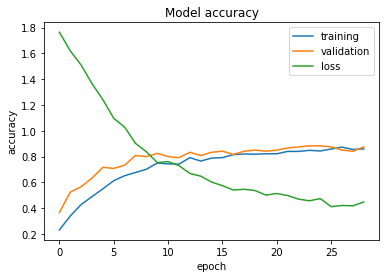

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h3.history['accuracy'])
plt.plot(h3.history['val_accuracy'])
plt.plot(h3.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

              precision    recall  f1-score   support

      Águila     0.8636    1.0000    0.9268        19
     Canario     0.9167    0.8462    0.8800        13
    Flamenco     0.7000    0.8750    0.7778        16
   Fodi Rojo     0.9655    0.9655    0.9655        29
     Lechuza     0.8571    0.7826    0.8182        23
    Pingüino     1.0000    0.8000    0.8889        20

    accuracy                         0.8833       120
   macro avg     0.8838    0.8782    0.8762       120
weighted avg     0.8937    0.8833    0.8841       120



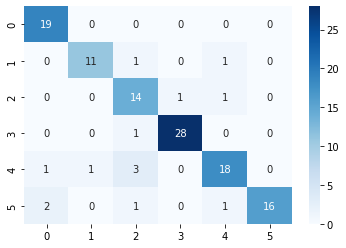

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model3.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4, target_names=class_names))

Podemos apreciar que nuestra red confunde varias lechuzas con flamencos, siendo las lechuzas la categoría que más le cuesta distinguir

In [ ]:
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Trabajo FSI/Pájaros/train/Águila/001.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model3.predict(img_array)
print(np.argmax(predictions[0]))

0


## Cuarto modelo


Este modelo constará de las siguientes capas:



1.   Capa convolutiva de 64 filtros
2.   Capa de MaxPooling
3.   Capa convolutiva de 128 filtros
4.   Capa de MaxPooling
5.   Dropout del 25%
6.   Capa convolutiva de 256 filtros
7.   Capa de Maxpooling
8.   Dropout del 25%
9.   Flatten()
10.  Capa Densa de 128 neuronas
11.  Dropout del 50%
12.  Capa Densa con 6 neuronas y función de activación softmax

Tendremos como función de error la categorical_crossentropy y para actualizar la tasa de aprendizaje utilizaremos el algoritmo de Adamax. Con este modelo veremos que tal se comporta el algoritmo Adamax de actualización de la tasa de aprendizaje.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_4 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_4 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 128)    

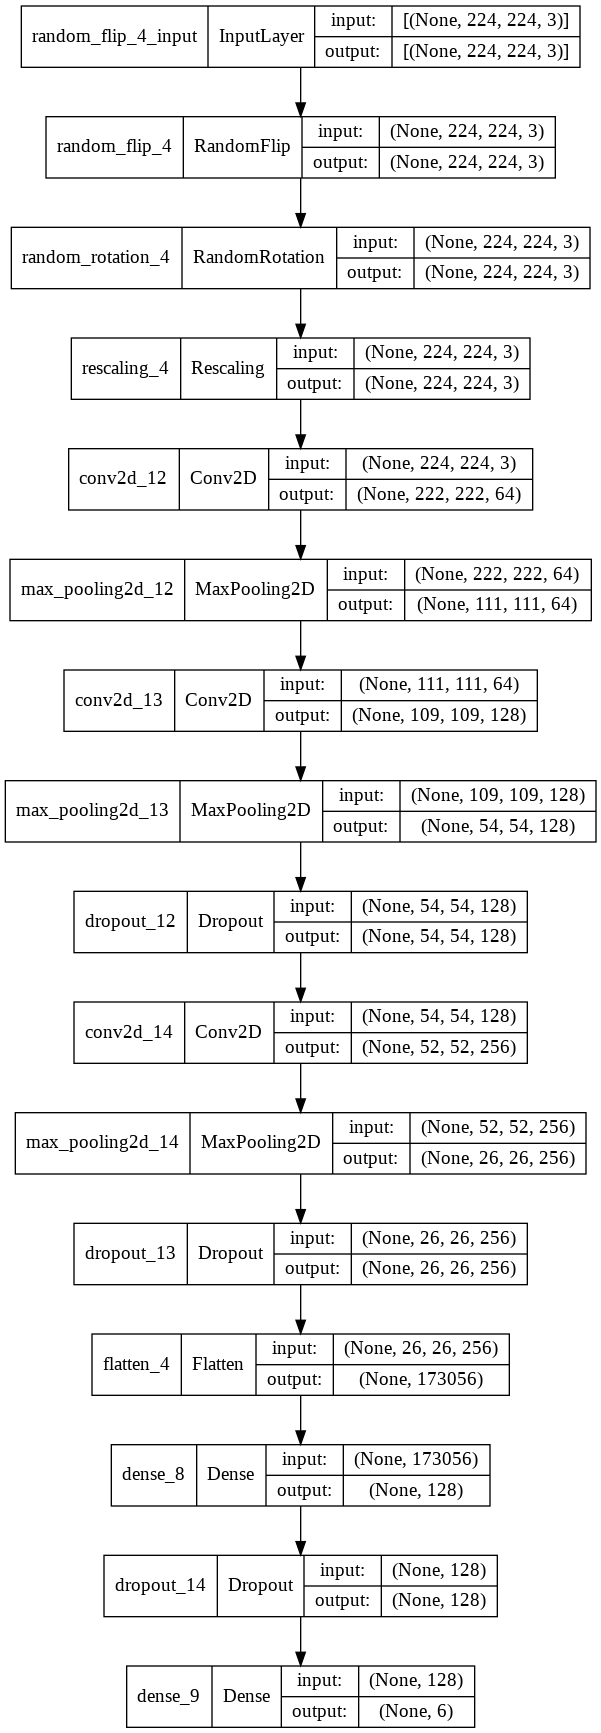

In [ ]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model4 = keras.Sequential( [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  ])
model4.add(Rescaling(scale=(1./127.5),
                    offset=-1))


model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(256, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(6, activation='softmax'))

model4.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adamax(1e-3),
              metrics=['accuracy'])


model4.summary()
keras.utils.plot_model(model4, "modelo4.png", show_shapes=True)

In [ ]:
# TRAINING --------------------------------------------------

epochs = 30

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

h4 = model4.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/30
30/30 [==============================] - 7s 191ms/step - loss: 2.7793 - accuracy: 0.3033 - val_loss: 1.3946 - val_accuracy: 0.5083
Epoch 2/30
30/30 [==============================] - 6s 185ms/step - loss: 1.1980 - accuracy: 0.5450 - val_loss: 0.8044 - val_accuracy: 0.7500
Epoch 3/30
30/30 [==============================] - 6s 185ms/step - loss: 0.8793 - accuracy: 0.6917 - val_loss: 0.6177 - val_accuracy: 0.7833
Epoch 4/30
30/30 [==============================] - 6s 184ms/step - loss: 0.6674 - accuracy: 0.7633 - val_loss: 0.5425 - val_accuracy: 0.8250
Epoch 5/30
30/30 [==============================] - 6s 183ms/step - loss: 0.6263 - accuracy: 0.7733 - val_loss: 0.5729 - val_accuracy: 0.8083
Epoch 6/30
30/30 [==============================] - 6s 184ms/step - loss: 0.5687 - accuracy: 0.8033 - val_loss: 0.4418 - val_accuracy: 0.8583
Epoch 7/30
30/30 [==============================] - 6s 183ms/step - loss: 0.4563 - accuracy: 0.8383 - val_loss: 0.4194 - val_accuracy: 0.8917
Epoch 

Vemos que mejora respecto a los dos modelos anteriores, con un **91,67%**. 

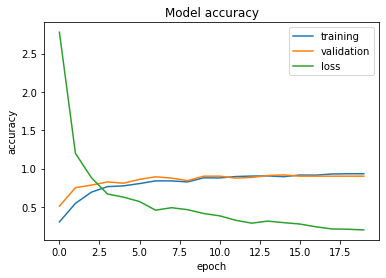

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h4.history['accuracy'])
plt.plot(h4.history['val_accuracy'])
plt.plot(h4.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

              precision    recall  f1-score   support

      Águila     0.9091    0.9524    0.9302        21
     Canario     0.9167    0.9167    0.9167        12
    Flamenco     0.7500    0.8824    0.8108        17
   Fodi Rojo     0.9655    0.9655    0.9655        29
     Lechuza     0.9524    0.8696    0.9091        23
    Pingüino     1.0000    0.8889    0.9412        18

    accuracy                         0.9167       120
   macro avg     0.9156    0.9126    0.9122       120
weighted avg     0.9229    0.9167    0.9181       120



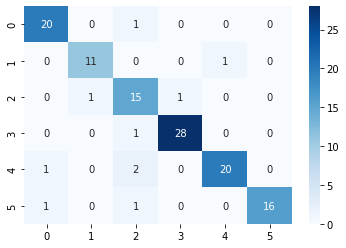

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model4.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4, target_names=class_names))

Si nos fijamos en la matriz de confusión. vemos que categoriza como flamencos bastantes aves que no lo son.

In [ ]:
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Trabajo FSI/Pájaros/train/Águila/001.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model4.predict(img_array)
print(np.argmax(predictions[0]))

0


## Quinto modelo


Este modelo constará de las siguientes capas:



1.   Capa convolutiva de 64 filtros
2.   Capa de MaxPooling
3.   Capa convolutiva de 128 filtros
4.   Capa de MaxPooling
5.   Dropout del 25%
6.   Capa convolutiva de 256 filtros
7.   Capa de Maxpooling
8.   Capa convolutiva de 512 filtros
9.   Capa de Maxpooling
10.  Dropout del 25%
11.  Flatten()
12.  Capa Densa con 128 neuronas
13.  Dropout del 50%
14.  Capa Densa con 6 neuronas y función de activación softmax

Tendremos como función de error la categorical_crossentropy y para actualizar la tasa de aprendizaje utilizaremos el algoritmo de Adam. 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_5 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 128)    

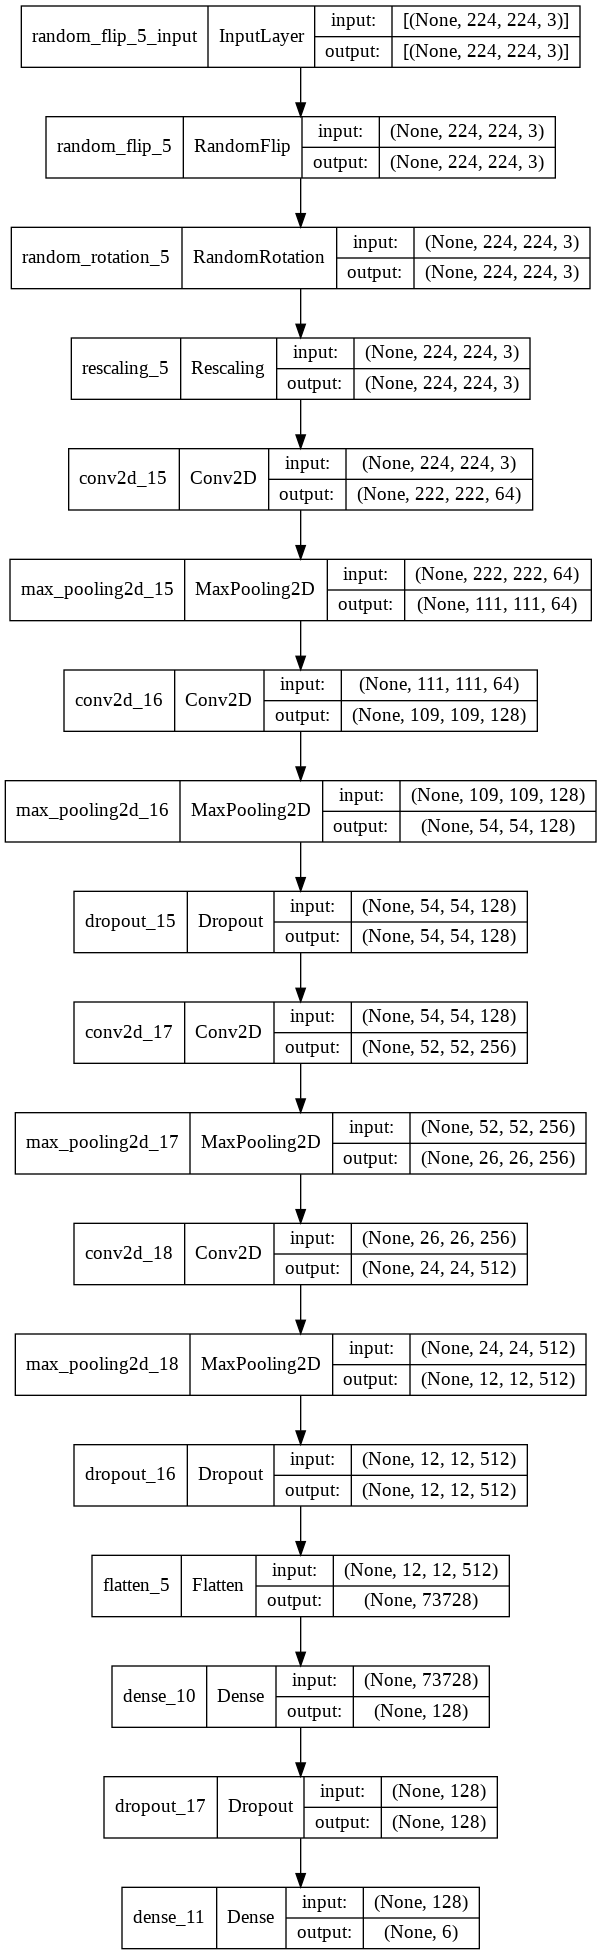

In [ ]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model5 = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  ])
model5.add(Rescaling(scale=(1./127.5),
                    offset=-1))


model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(256, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(512, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(6, activation='softmax'))

model5.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])


model5.summary()
keras.utils.plot_model(model5, "modelo5.png", show_shapes=True)

In [ ]:
# TRAINING --------------------------------------------------

epochs = 30

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

h5 = model5.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/30
30/30 [==============================] - 8s 205ms/step - loss: 1.8593 - accuracy: 0.2917 - val_loss: 1.3786 - val_accuracy: 0.4917
Epoch 2/30
30/30 [==============================] - 6s 198ms/step - loss: 1.0855 - accuracy: 0.6033 - val_loss: 0.7668 - val_accuracy: 0.7250
Epoch 3/30
30/30 [==============================] - 6s 199ms/step - loss: 0.8916 - accuracy: 0.6767 - val_loss: 0.7284 - val_accuracy: 0.7417
Epoch 4/30
30/30 [==============================] - 6s 199ms/step - loss: 0.6944 - accuracy: 0.7533 - val_loss: 0.5654 - val_accuracy: 0.7750
Epoch 5/30
30/30 [==============================] - 6s 198ms/step - loss: 0.6743 - accuracy: 0.7567 - val_loss: 0.5462 - val_accuracy: 0.8000
Epoch 6/30
30/30 [==============================] - 6s 196ms/step - loss: 0.5350 - accuracy: 0.8017 - val_loss: 0.6569 - val_accuracy: 0.7583
Epoch 7/30
30/30 [==============================] - 6s 197ms/step - loss: 0.5272 - accuracy: 0.8283 - val_loss: 0.5495 - val_accuracy: 0.8500
Epoch 

Como muestra la función de EarlyStopping(), la mejor época es la 17 con un **93,33%**.

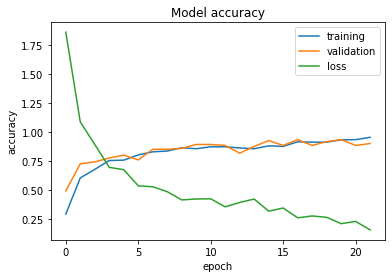

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h5.history['accuracy'])
plt.plot(h5.history['val_accuracy'])
plt.plot(h5.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

              precision    recall  f1-score   support

      Águila     1.0000    0.9565    0.9778        23
     Canario     1.0000    0.9231    0.9600        13
    Flamenco     0.7500    0.9375    0.8333        16
   Fodi Rojo     0.9655    0.9032    0.9333        31
     Lechuza     0.9524    0.9091    0.9302        22
    Pingüino     0.9375    1.0000    0.9677        15

    accuracy                         0.9333       120
   macro avg     0.9342    0.9382    0.9337       120
weighted avg     0.9412    0.9333    0.9351       120



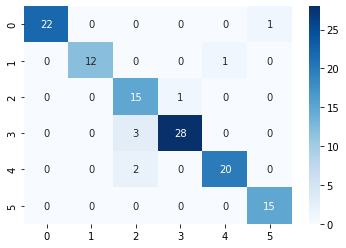

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model5.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4, target_names=class_names))

Al igual que el anterior modelo, vemos que confunde varias aves con flamencos.

In [ ]:
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Trabajo FSI/Pájaros/train/Águila/001.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model5.predict(img_array)
print(np.argmax(predictions[0]))

1


## Sexto modelo


Este modelo constará de las siguientes capas:



1.   Capa convolutiva de 256 filtros
2.   Capa de MaxPooling
3.   Capa convolutiva de 128 filtros
4.   Capa de MaxPooling
5.   Dropout del 25%
6.   Capa convolutiva de 64 filtros
7.   Capa de Maxpooling
8.   Dropout del 25%
9.   Flatten()
10.  Capa Densa con 128 neuronas
11.  Dropout del 50%
12.  Capa Densa con 6 neuronas y función de activación softmax

Tendremos como función de error la categorical_crossentropy y para actualizar la tasa de aprendizaje utilizaremos el algoritmo de Adam. 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_6 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_6 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 111, 111, 256)    0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 109, 109, 128)    

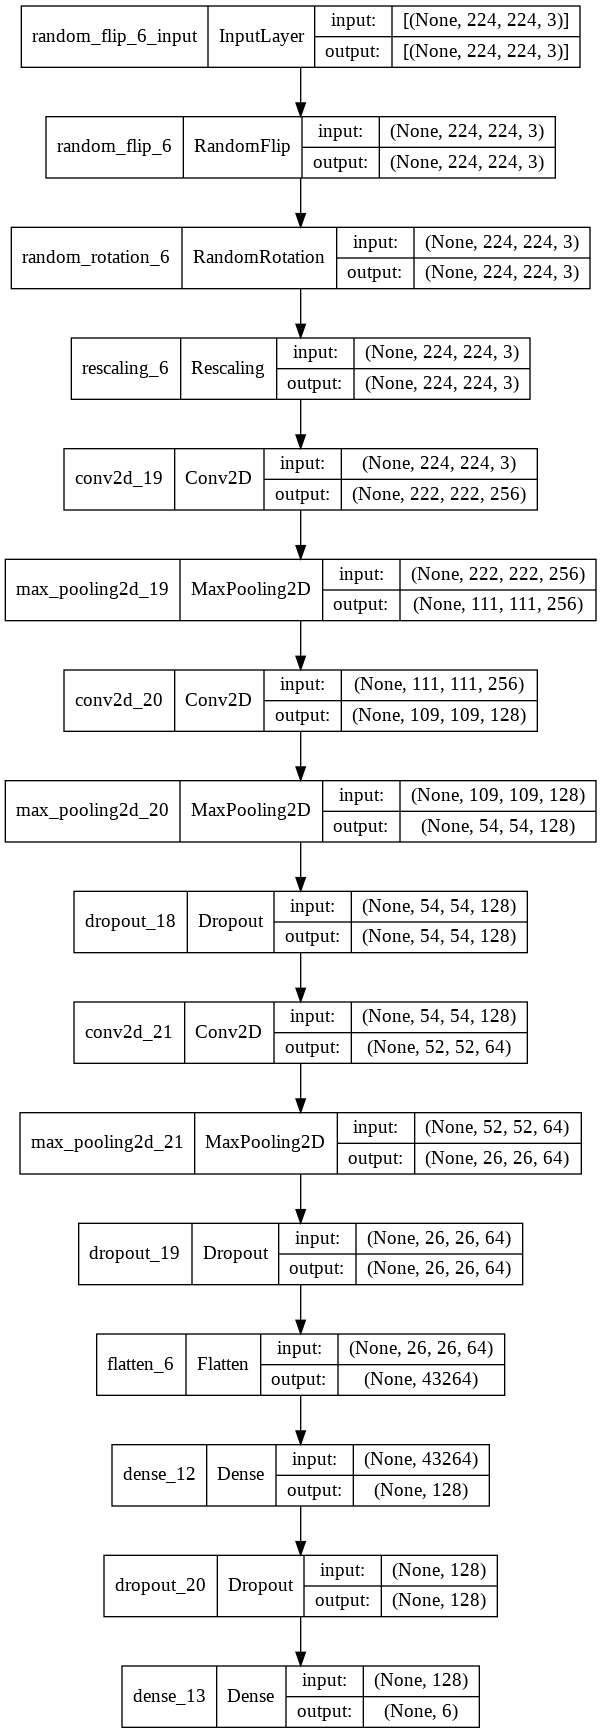

In [ ]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model6 = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  ])
model6.add(Rescaling(scale=(1./127.5),
                    offset=-1))


model6.add(Conv2D(256, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(6, activation='softmax'))

model6.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])


model6.summary()
keras.utils.plot_model(model6, "modelo6.png", show_shapes=True)

In [ ]:
# TRAINING --------------------------------------------------

epochs = 30

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

h6 = model6.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/30
30/30 [==============================] - 17s 388ms/step - loss: 1.5985 - accuracy: 0.3600 - val_loss: 1.2933 - val_accuracy: 0.6167
Epoch 2/30
30/30 [==============================] - 12s 382ms/step - loss: 0.9902 - accuracy: 0.6050 - val_loss: 0.7098 - val_accuracy: 0.7250
Epoch 3/30
30/30 [==============================] - 12s 384ms/step - loss: 0.8225 - accuracy: 0.6800 - val_loss: 0.6631 - val_accuracy: 0.7833
Epoch 4/30
30/30 [==============================] - 12s 382ms/step - loss: 0.6580 - accuracy: 0.7600 - val_loss: 0.4814 - val_accuracy: 0.8250
Epoch 5/30
30/30 [==============================] - 12s 382ms/step - loss: 0.5497 - accuracy: 0.8067 - val_loss: 0.4938 - val_accuracy: 0.8417
Epoch 6/30
30/30 [==============================] - 12s 382ms/step - loss: 0.4570 - accuracy: 0.8483 - val_loss: 0.3529 - val_accuracy: 0.8750
Epoch 7/30
30/30 [==============================] - 12s 380ms/step - loss: 0.4759 - accuracy: 0.8450 - val_loss: 0.4269 - val_accuracy: 0.8250

La época con mejores resultados es la época 10, con un **93,33%** de val_accuaracy.

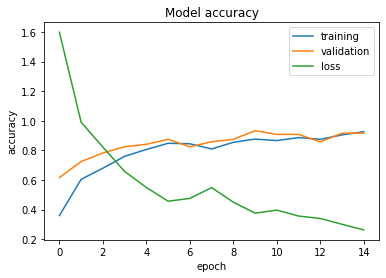

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h6.history['accuracy'])
plt.plot(h6.history['val_accuracy'])
plt.plot(h6.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

              precision    recall  f1-score   support

      Águila     0.9545    0.9545    0.9545        22
     Canario     1.0000    0.8571    0.9231        14
    Flamenco     0.7500    1.0000    0.8571        15
   Fodi Rojo     1.0000    0.9667    0.9831        30
     Lechuza     0.9524    0.8333    0.8889        24
    Pingüino     0.9375    1.0000    0.9677        15

    accuracy                         0.9333       120
   macro avg     0.9324    0.9353    0.9291       120
weighted avg     0.9431    0.9333    0.9343       120



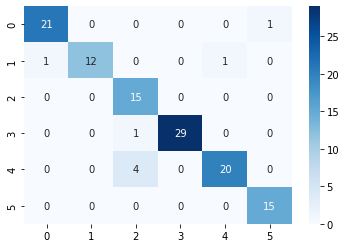

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model6.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4, target_names=class_names))

Podemos apreciar que confunde varias lechuzas con flamencos.

In [ ]:
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Trabajo FSI/Pájaros/train/Águila/001.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model6.predict(img_array)
print(np.argmax(predictions[0]))

0


## Séptimo modelo


Este modelo constará de las siguientes capas:



1.   Capa convolutiva de 512 filtros
2.   Capa de MaxPooling
3.   Capa convolutiva de 256 filtros
4.   Capa de MaxPooling
5.   Dropout del 25%
6.   Capa convolutiva de 128 filtros
7.   Capa de Maxpooling
8.   Capa convolutiva de 64 filtros
9.   Capa de Maxpooling
10.  Dropout del 25%
11.  Flatten()
12.  Capa Densa con 128 neuronas
13.  Dropout del 50% 
14.  Capa densa con 6 neuronas y función de activación softmax

Tendremos como función de error la categorical_crossentropy y para actualizar la tasa de aprendizaje utilizaremos el algoritmo de Adam. 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_7 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_7 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 222, 222, 512)     14336     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 111, 111, 512)    0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 256)    

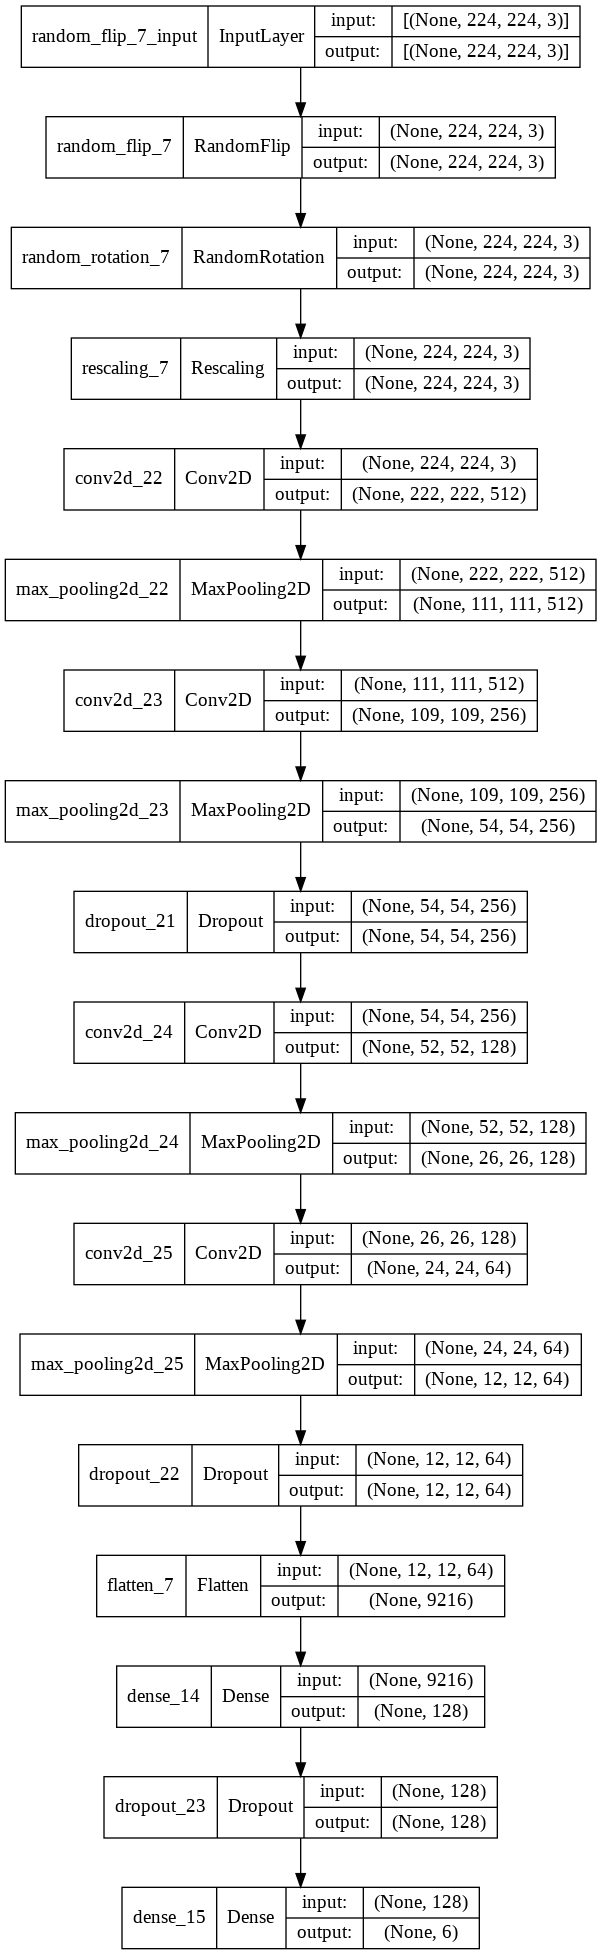

In [ ]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model7 = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                input_shape=(224,224,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  ])
model7.add(Rescaling(scale=(1./127.5),
                    offset=-1))


model7.add(Conv2D(512, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Conv2D(256, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))
model7.add(Conv2D(128, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))

model7.add(Flatten())
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(6, activation='softmax'))

model7.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])


model7.summary()
keras.utils.plot_model(model7, "modelo7.png", show_shapes=True)

In [ ]:
# TRAINING --------------------------------------------------

epochs = 30

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

h7 = model7.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/30
30/30 [==============================] - 32s 838ms/step - loss: 1.7089 - accuracy: 0.2800 - val_loss: 1.2976 - val_accuracy: 0.4667
Epoch 2/30
30/30 [==============================] - 26s 837ms/step - loss: 1.2336 - accuracy: 0.5167 - val_loss: 0.8519 - val_accuracy: 0.7000
Epoch 3/30
30/30 [==============================] - 26s 842ms/step - loss: 0.9176 - accuracy: 0.6767 - val_loss: 0.7573 - val_accuracy: 0.7500
Epoch 4/30
30/30 [==============================] - 26s 841ms/step - loss: 0.7601 - accuracy: 0.7233 - val_loss: 0.6741 - val_accuracy: 0.7333
Epoch 5/30
30/30 [==============================] - 26s 842ms/step - loss: 0.7018 - accuracy: 0.7617 - val_loss: 0.5061 - val_accuracy: 0.7917
Epoch 6/30
30/30 [==============================] - 26s 842ms/step - loss: 0.6688 - accuracy: 0.7700 - val_loss: 0.4881 - val_accuracy: 0.7917
Epoch 7/30
30/30 [==============================] - 26s 840ms/step - loss: 0.4668 - accuracy: 0.8350 - val_loss: 0.4712 - val_accuracy: 0.8250

Aunque la función de EarlyEstopping() nos muestre que la mejore época es al 20, escogeremos la 24 como la mejor por el hecho de que posee un valor dado por la función de error mucho menor. La precisión máxima lograda es de **93.33%.**

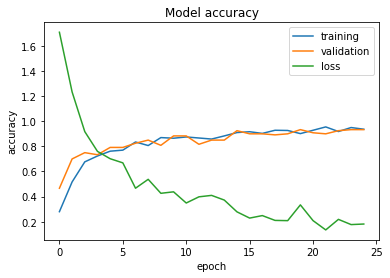

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h7.history['accuracy'])
plt.plot(h7.history['val_accuracy'])
plt.plot(h7.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

              precision    recall  f1-score   support

      Águila     0.9545    0.8750    0.9130        24
     Canario     1.0000    1.0000    1.0000        12
    Flamenco     0.7500    1.0000    0.8571        15
   Fodi Rojo     1.0000    0.9667    0.9831        30
     Lechuza     0.9524    0.9091    0.9302        22
    Pingüino     0.9375    0.8824    0.9091        17

    accuracy                         0.9333       120
   macro avg     0.9324    0.9389    0.9321       120
weighted avg     0.9421    0.9333    0.9348       120



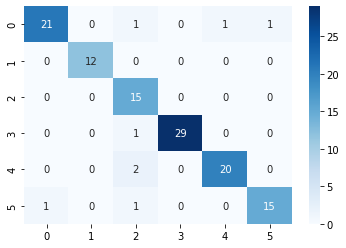

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model7.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4, target_names=class_names))

Como en anteriores modelos, este modelo clasifica como flamencos varias aves que no lo son.

In [ ]:
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Trabajo FSI/Pájaros/train/Águila/001.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model7.predict(img_array)
print(np.argmax(predictions[0]))

0


# Elección del modelo



Ahora mostraremos una tabla comparativa con los resultados obtenidos en los distintos modelos implementados para decidir cual de ellos nos ha ofrecido mejores valores a la hora de clasificar nuestro dataset:

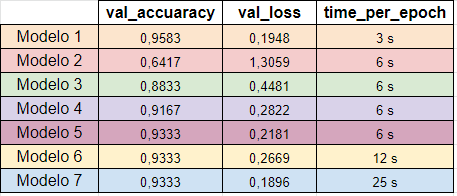

Como podemos ver en esta tabla comparativa, el modelo que ofrece mejores resultados en cuanto a precisión y tiempo de ejecución por época es el primer modelo implementado.